In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

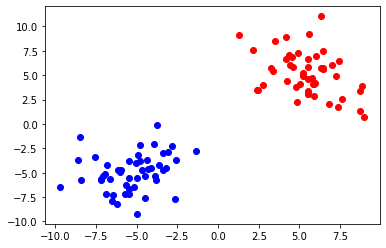

In [ ]:
centers = [(5, 5), (-5, -5)]
cluster_std = [2, 2]
x, y = make_blobs(n_samples=100, cluster_std=cluster_std, centers=centers)

plt.scatter(x[y == 0, 0], x[y == 0, 1], c='red')
plt.scatter(x[y == 1, 0], x[y == 1, 1], c='blue')
plt.plot()
plt.show()

In [ ]:
def plot(x, centeroids, labels, i):
  plt.title('Iteration {}'.format(i))
  plt.scatter(x[labels == 0, 0], x[labels == 0, 1], c='red')
  plt.scatter(x[labels == 1, 0], x[labels == 1, 1], c='blue')
  plt.scatter(centeroids[0, 0], centeroids[0, 1], c='orange')
  plt.scatter(centeroids[1, 0], centeroids[1, 1], c='green')
  plt.plot()
  plt.show()

In [ ]:
def calc_centeroids(x, k, labels):
  centeroids = np.zeros((k, 2))

  for i in range(k):
    centeroids[i] = x[labels == i].mean(axis=0)

  return centeroids

def calc_labels(x, k, centeroids):
  labels = np.zeros(x.shape[0])
  distances = np.zeros(k)

  for i in range(x.shape[0]):
    for j in range(k):
      distances[j] = np.sqrt(np.square(x[i] - centeroids[j]).sum())

    labels[i] = distances.argmin()

  return labels

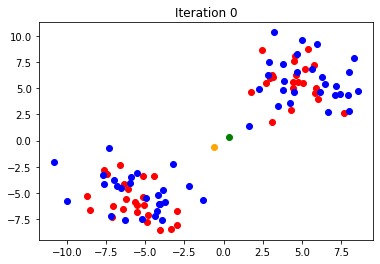

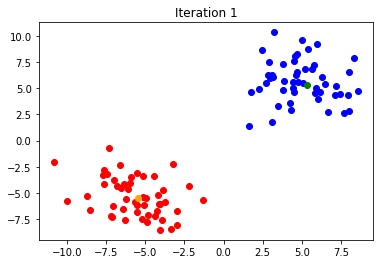

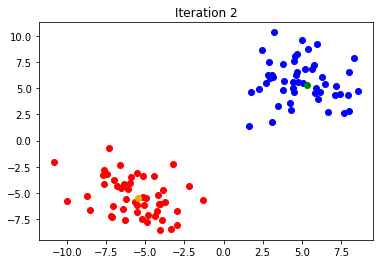

In [ ]:
MAX_ITERATIONS = 20

def kmeans(x, k):
  # Utilizing Random Partition - http://people.csail.mit.edu/tieu/notebook/kmeans/15_p600-hamerly.pdf
  # TODO: Change over to Forgy perhaps? - https://en.wikipedia.org/wiki/K-means_clustering#Initialization_methods
  labels = np.random.randint(0, k, size=x.shape[0])
  centeroids = calc_centeroids(x, k, labels)

  prev_centeroids = None
  i = 0

  plot(x, centeroids, labels, i)

  while i < MAX_ITERATIONS and not np.array_equal(prev_centeroids, centeroids):
    prev_centeroids = centeroids
    i += 1

    labels = calc_labels(x, k, centeroids)
    centeroids = calc_centeroids(x, k, labels)

    plot(x, centeroids, labels, i)

kmeans(x, 2)